In [5]:
# Merge interest + inflation + forward fill inflation data
import pandas as pd

# File paths
interest_rates_path = '/Users/hanshookoomsing/Documents/undergraduate_project/LSTM_TensorFlow/interest_rates.csv'
inflation_rates_path = '/Users/hanshookoomsing/Documents/undergraduate_project/LSTM_TensorFlow/inflation_rate.csv'
output_path = '/Users/hanshookoomsing/Documents/undergraduate_project/LSTM_TensorFlow/merged_inflation_interest.csv'

# Load datasets
interest_rates_df = pd.read_csv(interest_rates_path, parse_dates=['Date'])
inflation_rates_df = pd.read_csv(inflation_rates_path, parse_dates=['Date'])

# Check the first few rows of each dataframe to understand the structure
print("Interest Rates DataFrame:")
print(interest_rates_df.head())
print("\nInflation Rates DataFrame:")
print(inflation_rates_df.head())

# Forward fill the monthly inflation rates to daily dates
inflation_rates_df.set_index('Date', inplace=True)
inflation_rates_df = inflation_rates_df.resample('D').ffill().reset_index()

# Check the first few rows after resampling and forward filling
print("\nInflation Rates DataFrame after forward filling:")
print(inflation_rates_df.head(30))

# Merge interest rates and inflation rates on the 'Date' column
merged_df = interest_rates_df.merge(inflation_rates_df, on='Date', how='left')

# Check for any missing values after the merge
print("Missing values after merge:")
print(merged_df.isna().sum())

# Save the merged data to a CSV file
merged_df.to_csv(output_path, index=False)

print(f"Merged data saved to {output_path}")


Interest Rates DataFrame:
        Date  Interest Rate
0 2000-07-03           7.03
1 2000-07-04            NaN
2 2000-07-05           6.52
3 2000-07-06           6.51
4 2000-07-07           6.42

Inflation Rates DataFrame:
        Date  Inflation Rate
0 1999-12-01        2.167848
1 2000-01-01        2.335519
2 2000-02-01        2.379221
3 2000-03-01        2.483286
4 2000-04-01        2.409239

Inflation Rates DataFrame after forward filling:
         Date  Inflation Rate
0  1999-12-01        2.167848
1  1999-12-02        2.167848
2  1999-12-03        2.167848
3  1999-12-04        2.167848
4  1999-12-05        2.167848
5  1999-12-06        2.167848
6  1999-12-07        2.167848
7  1999-12-08        2.167848
8  1999-12-09        2.167848
9  1999-12-10        2.167848
10 1999-12-11        2.167848
11 1999-12-12        2.167848
12 1999-12-13        2.167848
13 1999-12-14        2.167848
14 1999-12-15        2.167848
15 1999-12-16        2.167848
16 1999-12-17        2.167848
17 1999-12-18 

In [6]:
# Interpolate linearly GDP data as saveguard
import pandas as pd

# File path
gdp_data_path = '/Users/hanshookoomsing/Documents/undergraduate_project/LSTM_TensorFlow/gdp.csv'
output_path = '/Users/hanshookoomsing/Documents/undergraduate_project/LSTM_TensorFlow/gdp_daily.csv'

# Load the GDP dataset
gdp_df = pd.read_csv(gdp_data_path, parse_dates=['Date'])

# Check the first few rows to understand the structure
print("GDP DataFrame:")
print(gdp_df.head())

# Resample GDP data from quarterly to daily using linear interpolation
gdp_df.set_index('Date', inplace=True)
gdp_df = gdp_df.resample('D').interpolate(method='linear').reset_index()

# Check the first few rows after resampling and interpolation
print("\nGDP DataFrame after interpolation:")
print(gdp_df.head(30))

# Save the daily GDP data to a CSV file
gdp_df.to_csv(output_path, index=False)

print(f"Daily GDP data saved to {output_path}")


GDP DataFrame:
        Date        GDP
0 1999-10-01   9900.169
1 2000-01-01  10002.179
2 2000-04-01  10247.720
3 2000-07-01  10318.165
4 2000-10-01  10435.744

GDP DataFrame after interpolation:
         Date          GDP
0  1999-10-01  9900.169000
1  1999-10-02  9901.277804
2  1999-10-03  9902.386609
3  1999-10-04  9903.495413
4  1999-10-05  9904.604217
5  1999-10-06  9905.713022
6  1999-10-07  9906.821826
7  1999-10-08  9907.930630
8  1999-10-09  9909.039435
9  1999-10-10  9910.148239
10 1999-10-11  9911.257043
11 1999-10-12  9912.365848
12 1999-10-13  9913.474652
13 1999-10-14  9914.583457
14 1999-10-15  9915.692261
15 1999-10-16  9916.801065
16 1999-10-17  9917.909870
17 1999-10-18  9919.018674
18 1999-10-19  9920.127478
19 1999-10-20  9921.236283
20 1999-10-21  9922.345087
21 1999-10-22  9923.453891
22 1999-10-23  9924.562696
23 1999-10-24  9925.671500
24 1999-10-25  9926.780304
25 1999-10-26  9927.889109
26 1999-10-27  9928.997913
27 1999-10-28  9930.106717
28 1999-10-29  9931.21

Original GDP DataFrame:
        Date        GDP
0 1999-10-01   9900.169
1 2000-01-01  10002.179
2 2000-04-01  10247.720
3 2000-07-01  10318.165
4 2000-10-01  10435.744

Interpolated GDP DataFrame:
        Date          GDP
0 1999-10-01  9900.169000
1 1999-10-02  9901.277804
2 1999-10-03  9902.386609
3 1999-10-04  9903.495413
4 1999-10-05  9904.604217

Missing values in interpolated GDP DataFrame:
Date    0
GDP     0
dtype: int64

Statistical summary of original GDP data:
                                Date           GDP
count                             98     98.000000
mean   2011-11-15 22:31:50.204081664  16892.043153
min              1999-10-01 00:00:00   9900.169000
25%              2005-10-24 00:00:00  13392.943000
50%              2011-11-16 00:00:00  15955.532000
75%              2017-12-09 00:00:00  20006.101750
max              2024-01-01 00:00:00  28255.928000
std                              NaN   4828.943551

Statistical summary of interpolated GDP data:
                  

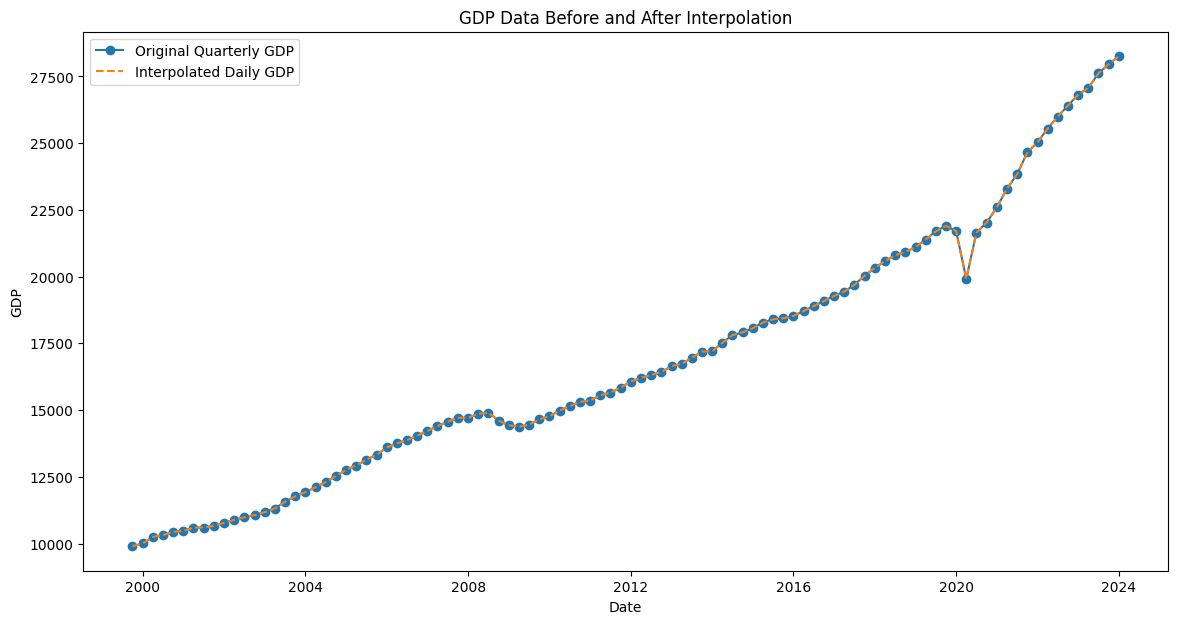


GDP values on specific dates for manual check:
Date: 2000-01-01, Interpolated GDP: 10002.179
Date: 2000-02-01, Interpolated GDP: 10085.824835164834
Date: 2000-03-01, Interpolated GDP: 10164.074164835163
Date: 2000-04-01, Interpolated GDP: 10247.72


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
gdp_data_path = '/Users/hanshookoomsing/Documents/undergraduate_project/LSTM_TensorFlow/gdp.csv'
gdp_daily_path = '/Users/hanshookoomsing/Documents/undergraduate_project/LSTM_TensorFlow/gdp_daily.csv'

# Load datasets
gdp_df = pd.read_csv(gdp_data_path, parse_dates=['Date'])
gdp_daily_df = pd.read_csv(gdp_daily_path, parse_dates=['Date'])

# Check the first few rows of each dataframe to understand the structure
print("Original GDP DataFrame:")
print(gdp_df.head())
print("\nInterpolated GDP DataFrame:")
print(gdp_daily_df.head())

# Check for missing values
print("\nMissing values in interpolated GDP DataFrame:")
print(gdp_daily_df.isna().sum())

# Statistical summary
print("\nStatistical summary of original GDP data:")
print(gdp_df.describe())
print("\nStatistical summary of interpolated GDP data:")
print(gdp_daily_df.describe())

# Plot the GDP data before and after interpolation
plt.figure(figsize=(14, 7))
plt.plot(gdp_df['Date'], gdp_df['GDP'], label='Original Quarterly GDP', marker='o')
plt.plot(gdp_daily_df['Date'], gdp_daily_df['GDP'], label='Interpolated Daily GDP', linestyle='--')
plt.xlabel('Date')
plt.ylabel('GDP')
plt.title('GDP Data Before and After Interpolation')
plt.legend()
plt.show()

# Specific Date Check
# Choose a few dates to manually verify the interpolation
check_dates = ['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01']
print("\nGDP values on specific dates for manual check:")
for date in check_dates:
    print(f"Date: {date}, Interpolated GDP: {gdp_daily_df[gdp_daily_df['Date'] == date]['GDP'].values[0]}")


In [9]:
import pandas as pd

# File paths
merged_interest_inflation_path = '/Users/hanshookoomsing/Documents/undergraduate_project/LSTM_TensorFlow/merged_inflation_interest.csv'
gdp_daily_path = '/Users/hanshookoomsing/Documents/undergraduate_project/LSTM_TensorFlow/gdp_daily.csv'
output_path = '/Users/hanshookoomsing/Documents/undergraduate_project/LSTM_TensorFlow/final_merged_data.csv'

# Load datasets
merged_interest_inflation_df = pd.read_csv(merged_interest_inflation_path, parse_dates=['Date'])
gdp_daily_df = pd.read_csv(gdp_daily_path, parse_dates=['Date'])

# Check the first few rows of each dataframe to understand the structure
print("Merged Interest and Inflation Rates DataFrame:")
print(merged_interest_inflation_df.head())
print("\nInterpolated GDP DataFrame:")
print(gdp_daily_df.head())

# Merge the datasets on the 'Date' column
final_merged_df = merged_interest_inflation_df.merge(gdp_daily_df, on='Date', how='left')

# Check for missing values after the merge
print("Missing values after merge:")
print(final_merged_df.isna().sum())

# Save the final merged data to a CSV file
final_merged_df.to_csv(output_path, index=False)

print(f"Final merged data saved to {output_path}")


Merged Interest and Inflation Rates DataFrame:
        Date  Interest Rate  Inflation Rate
0 2000-07-03           7.03         2.71297
1 2000-07-04            NaN         2.71297
2 2000-07-05           6.52         2.71297
3 2000-07-06           6.51         2.71297
4 2000-07-07           6.42         2.71297

Interpolated GDP DataFrame:
        Date          GDP
0 1999-10-01  9900.169000
1 1999-10-02  9901.277804
2 1999-10-03  9902.386609
3 1999-10-04  9903.495413
4 1999-10-05  9904.604217
Missing values after merge:
Date                0
Interest Rate     231
Inflation Rate      0
GDP                 0
dtype: int64
Final merged data saved to /Users/hanshookoomsing/Documents/undergraduate_project/LSTM_TensorFlow/final_merged_data.csv
